In [18]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("churn.csv")
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
108,8597-CWYHH,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Mailed check,94.35,3921.3,No
6855,8738-JOKAR,Female,0,No,No,42,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Mailed check,67.70,2882.25,No
236,0621-JFHOL,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Two year,Yes,Mailed check,29.60,299.05,No
2251,1399-UBQIU,Male,0,No,No,11,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.35,712.25,No
6391,4000-VGMQP,Male,0,Yes,Yes,38,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.95,2862.55,No
2047,8543-MSDMF,Male,0,No,No,3,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,77.40,206.15,No
4189,7103-ZGVNT,Female,0,Yes,Yes,69,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,No,Credit card (automatic),73.70,4885.85,No


In [3]:
df.shape

(7043, 21)

In [4]:
[i for i in df.columns]

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [87]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

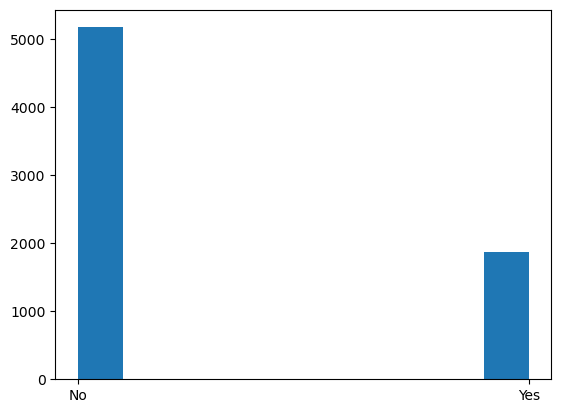

In [88]:
plt.hist(df.Churn)
plt.show()

In [7]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(np.round(numRetained/(numRetained + numChurned) * 100,2),'% of customers stayed with the company')
# print the percentage of customers that left
print(np.round(numChurned/(numRetained + numChurned) * 100,2), '% of customers left the company')

73.46 % of customers stayed with the company
26.54 % of customers left the company


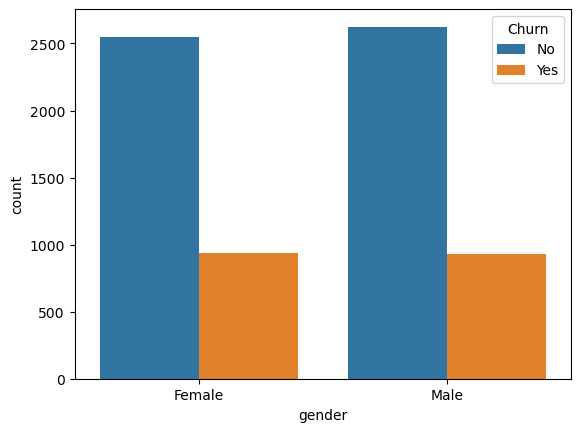

In [8]:
sns.countplot(x ='gender', hue='Churn', data=df)
plt.show()

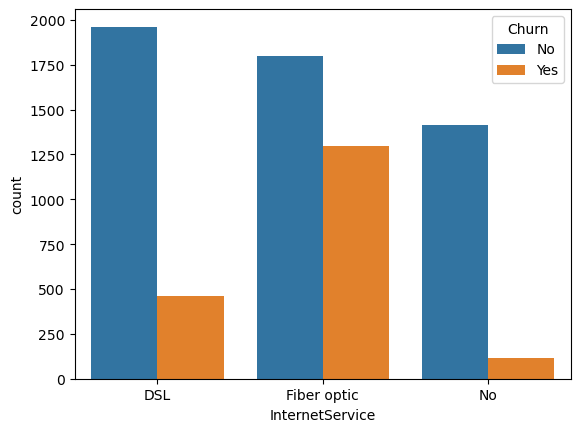

In [9]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

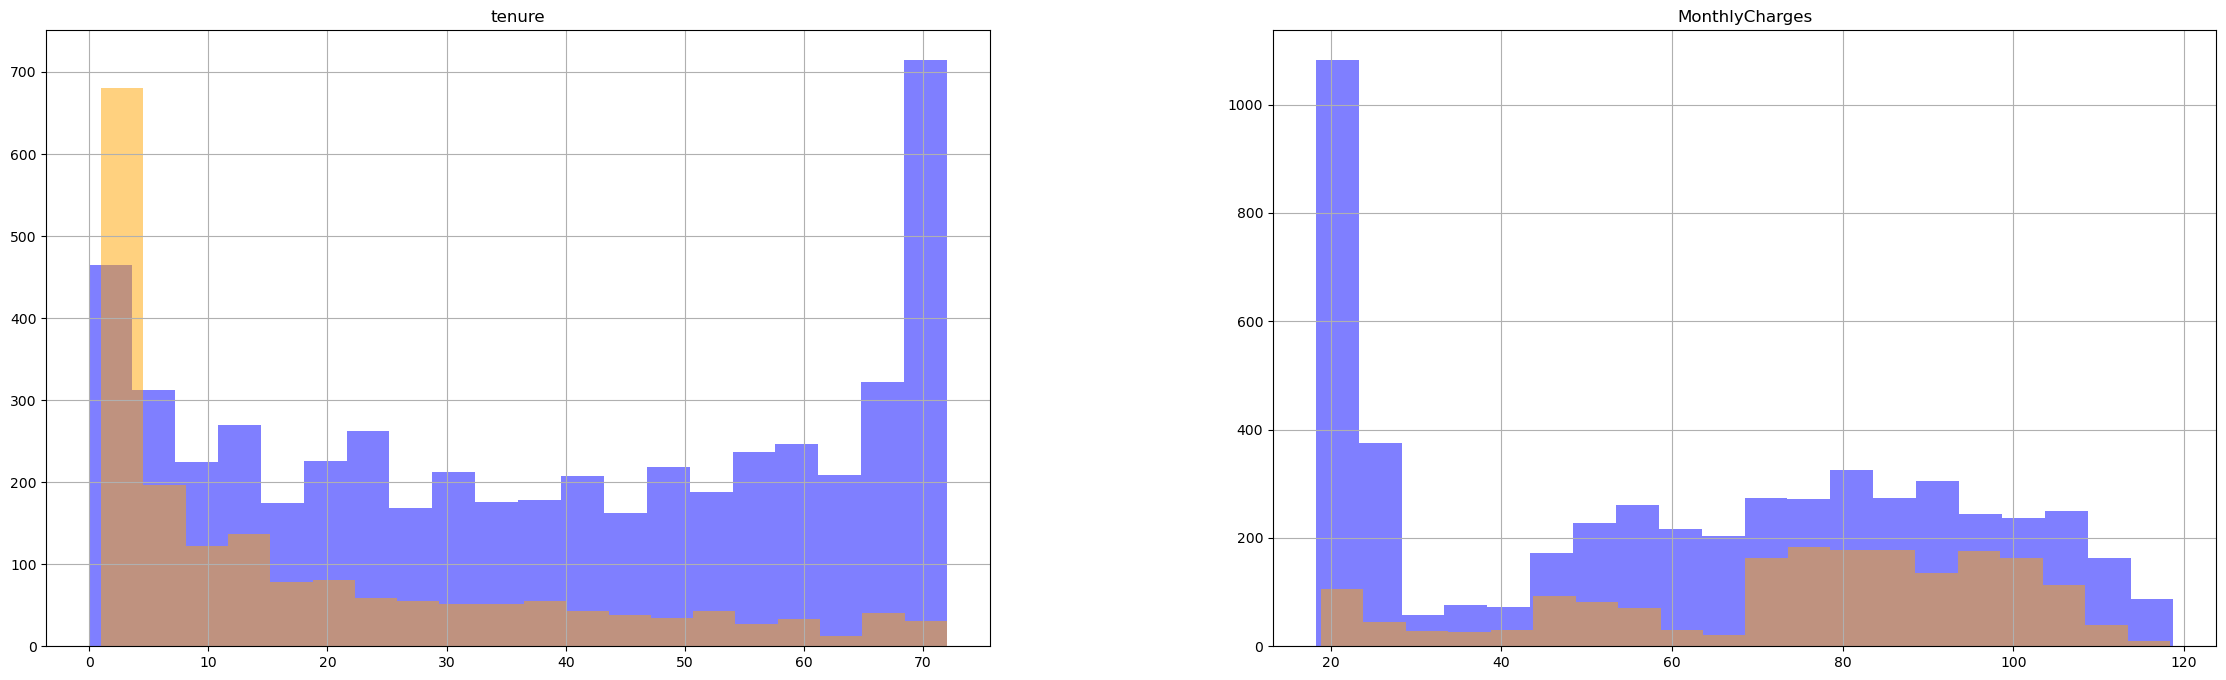

In [10]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

In [34]:
cleanDF = df.drop('customerID', axis=1)

In [35]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
cleanDF = cleanDF[['gender','SeniorCitizen','Partner','Dependents','PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod','Churn',
 'MonthlyCharges',
 'TotalCharges','tenure']]

In [37]:
cleanDF

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,29.85,29.85,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,56.95,1889.5,34
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,53.85,108.15,2
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,42.30,1840.75,45
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,70.70,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,84.80,1990.5,24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,103.20,7362.9,72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,29.60,346.45,11
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,74.40,306.6,4


In [38]:
label_encoder = LabelEncoder()

In [39]:
#Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
    if cleanDF[column].dtype == np.number:
        continue
    cleanDF[column] = label_encoder.fit_transform(cleanDF[column])

C:\Users\lohith.boddu\AppData\Local\Temp\ipykernel_10388\867611937.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleanDF[column].dtype == np.number:


In [40]:
joblib.dump(label_encoder, "label_encoder.joblib")

['label_encoder.joblib']

In [41]:
cleanDF.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
MonthlyCharges      float64
TotalCharges          int32
tenure                int64
dtype: object

In [42]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges,tenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85,2505,1
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1466,34
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,157,2
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,42.30,1400,45
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,70.70,925,2


In [43]:
stand_scalar = StandardScaler()

In [44]:
#Scaled the data
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = stand_scalar.fit_transform(x)

In [45]:
joblib.dump(stand_scalar, "stand_scalar.joblib")

['stand_scalar.joblib']

In [46]:
# Train/Test Split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [47]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [48]:
#Output
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [49]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [50]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [51]:
import joblib

In [52]:
joblib.dump(model, "churn_model.joblib", compress=9)

['churn_model.joblib']

In [39]:
xtrain

array([[-1.00955867, -0.43991649, -0.96662231, ...,  1.33486261,
         0.00293498, -1.40201791],
       [-1.00955867, -0.43991649, -0.96662231, ..., -1.47405205,
         1.07811764,  0.56191289],
       [ 0.99053183, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.37303293, -0.69777743],
       ...,
       [ 0.99053183, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.44947559, -0.31706396],
       [ 0.99053183,  2.27315869, -0.96662231, ...,  0.39855772,
         1.15289851, -1.5290989 ],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.53774716,
        -1.49434411,  0.33475562]])

In [40]:
cleanDF

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
label_encoder = LabelEncoder()
joblib.dump(label_encoder, "label_encoder.joblib")

['label_encoder.joblib']

In [80]:
a = np.array(["DEC","Hero",1])
label_encoder.fit_transform(a)

array([1, 2, 0], dtype=int64)

In [45]:
stand_scalar = StandardScaler()
joblib.dump(stand_scalar, "stand_scalar.joblib")

['stand_scalar.joblib']

In [46]:
cleanDF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [54]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [72]:
np.sort([i for i in df.MonthlyCharges.unique()])

array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75])

In [73]:
df.MonthlyCharges.nunique()

1585

In [75]:
np.sort([i for i in df.TotalCharges.unique()])

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype='<U7')

In [76]:
import streamlit as st

In [ ]:
st.number_input()

In [62]:
[i for i in cleanDF]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'MonthlyCharges',
 'TotalCharges',
 'tenure']

In [107]:
a = np.array([1,2,34,9,99])

In [109]:
a[1:3]

array([ 2, 34])

In [1]:
import pandas as pd

In [61]:
pd.DataFrame({'gender':[1],'asdsa' : ['asd']})

,gender,asdsa
0,1,asd
